In [82]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("Bengaluru_House_Data.csv")

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.groupby("area_type")["area_type"].agg("count")

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
df.shape

(13320, 9)

 **while filling na values : (1) use mean() when the values are continuous (float values) and (2) use median() when the values are classified (like number of Balcony which cannot be a float value)**

In [6]:
df.drop(["area_type","availability","society","balcony"],axis=1,inplace=True)

In [7]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [8]:
df.dropna(inplace=True)    #drops all the Rows which has NA values

In [9]:
df.shape    

(13246, 5)

In [10]:
df["size"].unique()    #BHK and bedroooms are same

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [11]:
# Now we will be needing the first numeric value only

df["bhk"]=df["size"].apply(lambda x: int(x.split(" ")[0]))  

 **x.split splits string with reference to the space and then using indexing [0] to grab the first value(which is the numeric value , then we use int() to convert the string into int and return it**

In [12]:
df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [13]:
df["bhk"].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [14]:
df[df.bhk>20]    # its not possible to have house with 43 bedroooms in just area of 2400 sqft

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [15]:
df.total_sqft.unique()   # here you can see a sqft in range-> so we will take avg of min and max  

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [16]:
#this function will check whether the value is convertable to float or not
#the values which have range or string in it they cannot be converted float -> so the func returns flase for it

def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [17]:
df.total_sqft.apply(is_float)   #returns Boolean value

0        True
1        True
2        True
3        True
4        True
         ... 
13315    True
13316    True
13317    True
13318    True
13319    True
Name: total_sqft, Length: 13246, dtype: bool

In [18]:
df[df.total_sqft.apply(is_float)].head() #returns the rows with only True boolean values-> but we need the opposite

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [19]:
df[~df.total_sqft.apply(is_float)].tail(10)   #putting the negate symbol-> converts Flase to True and returns them

,location,size,total_sqft,bath,price,bhk
12544,Hebbal,4 BHK,4000 - 4450,6.0,359.000,4
12560,Hosa Road,3 BHK,142.84Sq. Meter,3.0,110.000,3
12652,Billamaranahalli,2 Bedroom,300Sq. Yards,2.0,150.000,2
12791,Bannerghatta Road,2 BHK,1115 - 1130,2.0,61.740,2
12955,Thanisandra,3 BHK,1437 - 1629,3.0,75.885,3
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2
13299,Whitefield,4 BHK,2830 - 2882,5.0,154.500,4


In [20]:
def convert_to_sqft(x):
    tokens =x.split("-")
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except: 
        return None

In [21]:
convert_to_sqft("4000 - 4450")

4225.0

In [22]:
convert_to_sqft("2000")

2000.0

In [23]:
print(convert_to_sqft("200yard"))  #returns none

None


In [24]:
df["sqft"]=df["total_sqft"].apply(convert_to_sqft)

In [25]:
df.head()

,location,size,total_sqft,bath,price,bhk,sqft
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2,1056.0
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4,2600.0
2,Uttarahalli,3 BHK,1440,2.0,62.00,3,1440.0
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3,1521.0
4,Kothanur,2 BHK,1200,2.0,51.00,2,1200.0


In [26]:
df.drop(["total_sqft","size"],axis=1,inplace=True)

In [27]:
df.isnull().sum()

location     0
bath         0
price        0
bhk          0
sqft        46
dtype: int64

In [28]:
df.dropna(inplace=True)

In [29]:
df.isnull().sum()

location    0
bath        0
price       0
bhk         0
sqft        0
dtype: int64

### Feature engineering -> adding new Feature

In [30]:
#adding price_per_sqft

df["price_per_sqft"]= (df["price"]*100000)/df["sqft"]

In [32]:
df.head(3)

,location,bath,price,bhk,sqft,price_per_sqft
0,Electronic City Phase II,2.0,39.07,2,1056.0,3699.810606
1,Chikka Tirupathi,5.0,120.00,4,2600.0,4615.384615
2,Uttarahalli,2.0,62.00,3,1440.0,4305.555556


In [34]:
# working loaction feature

len(df.location.unique())   #a lot of location so we will define a Other category

1298

In [37]:
df["location"].apply(lambda x: x.strip())

0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13315                  Whitefield
13316               Richards Town
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
13319                Doddathoguru
Name: location, Length: 13200, dtype: object

In [52]:
loc_count=df.groupby("location")["location"].agg("count")
len(loc_count)

1298

In [56]:
other=loc_count[loc_count<=10]
len(other)

1058

In [58]:
##applying it 

df.location=df.location.apply(lambda x: "other" if x in other else x)

In [63]:
len(df.location.unique())

241

In [66]:
df.tail()    #2nd location is converted now to other

,location,bath,price,bhk,sqft,price_per_sqft
13315,Whitefield,4.0,231.0,5,3453.0,6689.834926
13316,other,5.0,400.0,4,3600.0,11111.111111
13317,Raja Rajeshwari Nagar,2.0,60.0,2,1141.0,5258.545136
13318,Padmanabhanagar,4.0,488.0,4,4689.0,10407.336319
13319,Doddathoguru,1.0,17.0,1,550.0,3090.909091


### Outlier removal -> data errors or extreme variation in data

In [70]:
#on seeing the data you can say that sqft per room must be around 600

df[df["sqft"]/df["bhk"]<300].head()  #these are anomalies -> we need to remove them

,location,bath,price,bhk,sqft,price_per_sqft
9,other,6.0,370.0,6,1020.0,36274.509804
45,HSR Layout,9.0,200.0,8,600.0,33333.333333
58,Murugeshpalya,4.0,150.0,6,1407.0,10660.980810
68,other,7.0,85.0,8,1350.0,6296.296296
70,other,3.0,100.0,3,500.0,20000.000000


In [74]:
df=df[~(df["sqft"]/df["bhk"]<300)]   # Negate~ will filter out the outliers

In [78]:
df.price_per_sqft.describe()   #min value is very low and unlikely , same case with max

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [99]:
a=[]
for key ,subdf in df.groupby("location"): 
    a.append(np.mean(subdf.price_per_sqft))
len(a)

241

In [115]:
def remove_outliers(var):
    df_out=pd.DataFrame()
    for key, subdf in var.groupby("location"):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df= subdf[(subdf.price_per_sqft> (m-st)) & (subdf.price_per_sqft< (m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [116]:
df1=remove_outliers(df)

In [117]:
df1.shape   #around 2000 outliers have been removed

(10245, 6)

In [118]:
df.shape

(12456, 6)

**Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like**


In [122]:
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

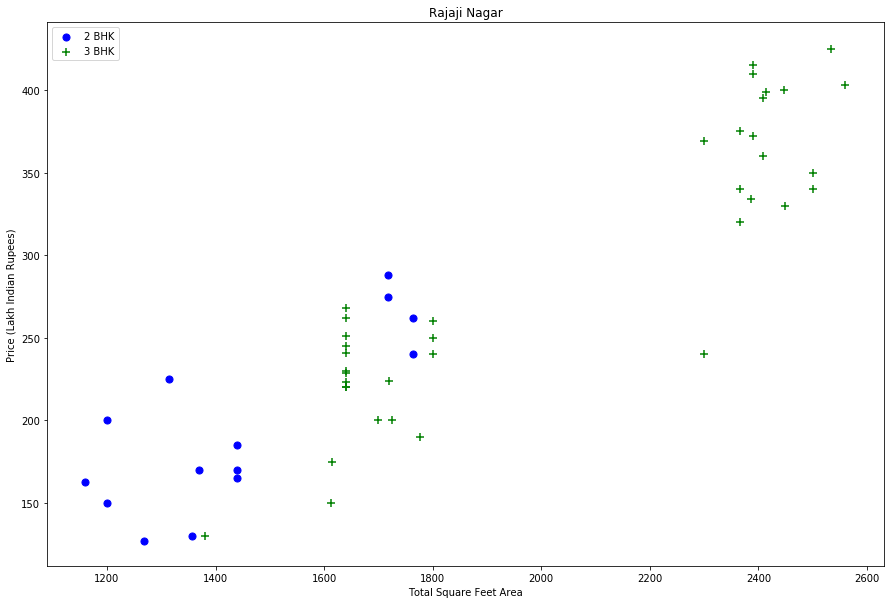

In [124]:

def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df1,"Rajaji Nagar")

#between 1600 and 1800 we can see a vertical line which shows for same area price for 2 bedroom is higher than of 3

**We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.**

{
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}
Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [125]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [126]:
df2 = remove_bhk_outliers(df1)
df2.shape

(7331, 6)

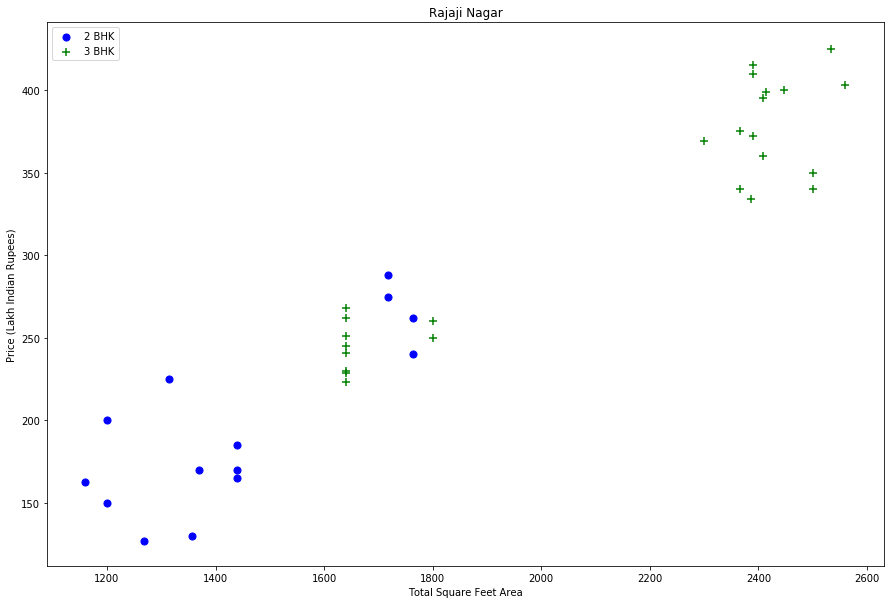

In [127]:
plot_scatter_chart(df2,"Rajaji Nagar") #you can notice the diff between this and previous

Text(0, 0.5, 'Count')

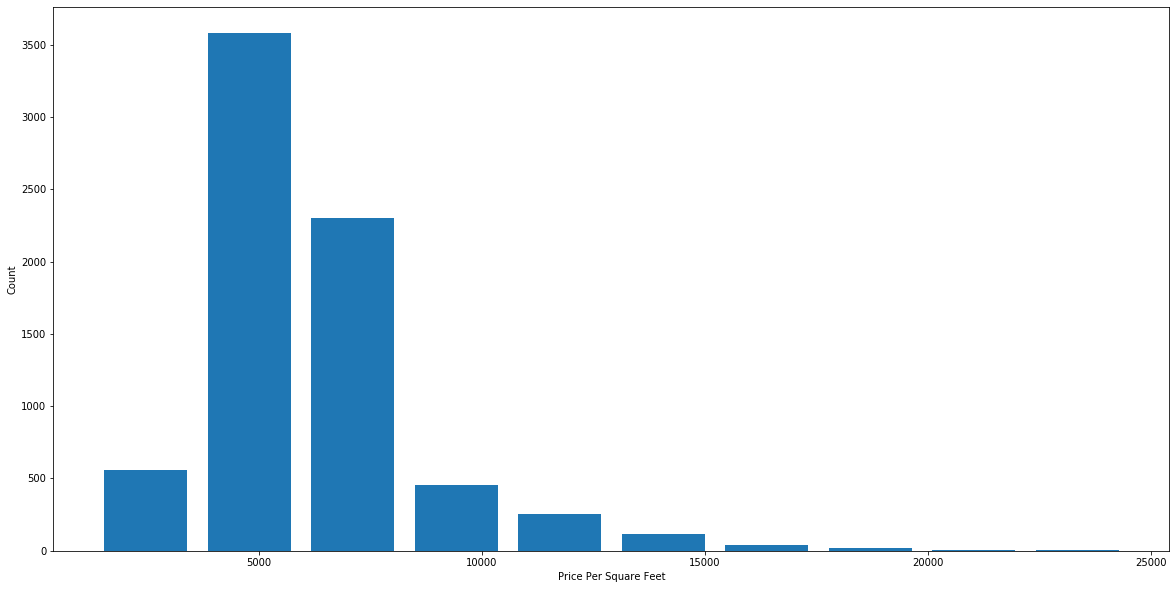

In [129]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df2.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

#lokks perfect #bell curve

**It is unusual to have 2 more bathrooms than number of bedrooms in a home**

In [132]:
df2[df2.bath>df2.bhk+2]

,location,bath,price,bhk,sqft,price_per_sqft
1637,Chikkabanavar,7.0,80.0,4,2460.0,3252.032520
5232,Nagasandra,8.0,450.0,4,7000.0,6428.571429
6702,Thanisandra,6.0,116.0,3,1806.0,6423.034330
8402,other,9.0,1000.0,6,11338.0,8819.897689


In [133]:
df3=df2[df2.bath<df2.bhk+2]   #removing the outliers

In [134]:
df3.shape

(7253, 6)

**we will drop the unneccesary columns like price_per_sqft as it has no other use than removing the outliers**

In [138]:
df3.drop("price_per_sqft",axis=1,inplace=True)

/Users/sudhanshukumar/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [143]:
len(df3)

7253

In [144]:
#One hot encoding

dummies=pd.get_dummies(df3.location)
dummies.head()
len(dummies)

7253

In [145]:
df4=pd.concat([df3,dummies.drop("other",axis=1)],axis=1)   #remember to specify the axis
df4.head()

,location,bath,price,bhk,sqft,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,Devarachikkanahalli,2.0,40.0,2,1250.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarachikkanahalli,2.0,83.0,2,1200.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Devarachikkanahalli,2.0,40.0,2,1170.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Devarachikkanahalli,2.0,65.0,3,1425.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Devarachikkanahalli,2.0,43.0,2,947.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [147]:
df4.drop("location",axis=1,inplace=True)

## Model Training

In [148]:
X=df4.drop("price",axis=1)
y=df4.price

In [150]:
from sklearn.model_selection import train_test_split

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [155]:
from sklearn.linear_model import LinearRegression

In [157]:
lr=LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.8595687461072331

In [167]:
from sklearn.model_selection import GridSearchCV,ShuffleSplit

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.848456,{'normalize': True}
1,lasso,0.709015,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.753177,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [168]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression(normalize=True)
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.8595687461071946

### Exporting the model

In [169]:
import joblib

joblib.dump(lr,"Bangalore_House_prices")

['Bangalore_House_prices']

### Export location and column information to a file that will be useful later on in our prediction application


In [170]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))